# Designing A Web App for Exploring Land-Ocean Temperature Data

### Goal of this Notebook

This notebook is designed to provide a review of the data and the smoothing algorithms we will use in the web app being developed as a part of this tutorial.

### Steps You Will Take In This Notebook
In this notebook you will:
1. Review how to load data from a CSV file into a `pandas` DataFrame.
2. Plot the data to visualize the temperature trends using the `matplotlib` library.
3. Review the smoothing algorithms we will use in the web app and add smoothed data to the DataFrame (and plot).
4. Revise how to export a selected subset of the data to a new CSV file.

## Describing the Elements of our Dashboard

Across all the notebooks in this tutorial, we will be developing a small web app that will provide a graphical user interface (GUI) for exploring a dataset that contains global land-ocean temperature data. The data is stored in a CSV file.

We will build the web app using a Jupyter notebook where our workflow will:
- **load a data file** with global land-ocean temperature data and
- **smooth the data with an algorithm with different smoothing parameters**.
- In the GUI, you should be able to **select a particular range of years** and
- **create a new data file** containing the smoothed data for desired time range.

Before building the web app, let's explore the data and the smoothing algorithms we will use.

In [1]:
# Load the required libraries
import pandas as pd
import os

## Load data from file

We have a CSV data file containing Global Annual Mean Surface Air Temperature Change data from 1880 to 2023 [downloaded from NASA](https://data.giss.nasa.gov/gistemp/graphs/).  This is the data that we would ultimately like to visualize using a web app. We will start by loading the data for this tutorial from the CSV file into a `pandas` DataFrame.

In [2]:
# Load data into memory from file
DATA_DIR = 'data'
DATA_FILE = 'land-ocean-temp-index.csv'

df = pd.read_csv(os.path.join(DATA_DIR, DATA_FILE), escapechar='#')
df

,Year,Temperature
0,1880,-0.16
1,1881,-0.08
2,1882,-0.11
3,1883,-0.17
4,1884,-0.28
...,...,...
139,2019,0.98
140,2020,1.02
141,2021,0.85
142,2022,0.90


## Plotting the Raw Data

We will plot the raw data to visualize the temperature trends.

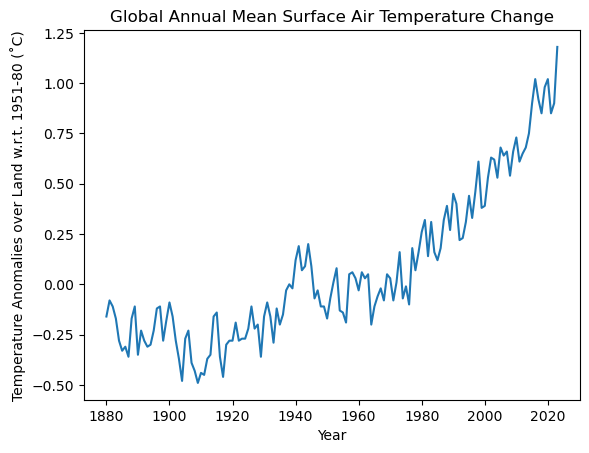

In [5]:
from matplotlib import pyplot as plt

plt.xlabel('Year')
plt.ylabel('Temperature Anomalies over Land w.r.t. 1951-80 (˚C)')
plt.title('Global Annual Mean Surface Air Temperature Change')
plt.plot(df['Year'], df['Temperature'], label='Raw Data')
plt.show()

## Adding Columns for Filtered Data

Let's implement the [Savitzky-Golay filter](https://en.wikipedia.org/wiki/Savitzky–Golay_filter) and add a new column to the data frame with the smoothed data.  This filter is a type of low-pass filter that can be used for smoothing noisy data. The "moving average" filter common in financial data analysis is a special case of the Savitzky-Golay filter with polynomial order 1.

In [6]:
from scipy.signal import savgol_filter

# Set the window size and polynomial order for the Savitzky-Golay filter
window_size = 7
poly_order = 5

moving_avg_col = f'Moving_Average_{window_size}'
SG_col = f'Savitzky_Golay{poly_order}_{window_size}'

# Apply Savitzky-Golay smoothing to the Temperature column (rounding to 3 decimal
# places)
df[moving_avg_col] = savgol_filter(df['Temperature'], window_size, 1).round(decimals=3)
df[SG_col] = savgol_filter(df['Temperature'], window_size, poly_order).round(decimals=3)
df

,Year,Temperature,Moving_Average_7,Savitzky_Golay5_7
0,1880,-0.16,-0.086,-0.160
1,1881,-0.08,-0.126,-0.083
2,1882,-0.11,-0.166,-0.103
3,1883,-0.17,-0.206,-0.180
4,1884,-0.28,-0.234,-0.276
...,...,...,...,...
139,2019,0.98,0.934,0.975
140,2020,1.02,0.957,0.991
141,2021,0.85,0.984,0.872
142,2022,0.90,1.011,0.891


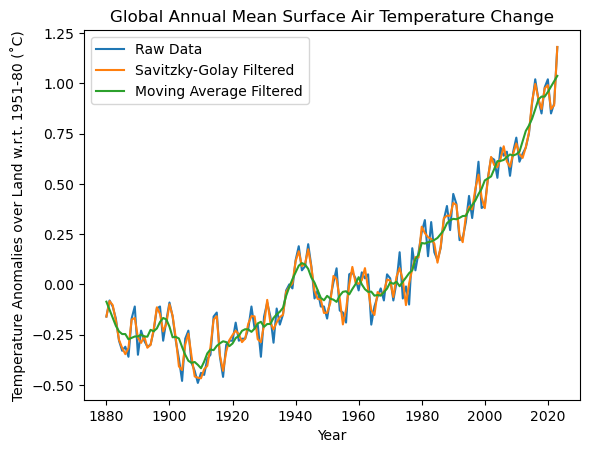

In [7]:
plt.xlabel('Year')
plt.ylabel('Temperature Anomalies over Land w.r.t. 1951-80 (˚C)')
plt.title('Global Annual Mean Surface Air Temperature Change')
plt.plot(df['Year'], df['Temperature'], label='Raw Data')
plt.plot(df['Year'], df[SG_col], label='Savitzky-Golay Filtered')
plt.plot(df['Year'], df[moving_avg_col], label='Moving Average Filtered')
plt.legend()
plt.show()

## Selecting a Subset of Data to Export

`pandas` makes it easy to select a subset of the data. We will select a subset of the data covering the 60 year period from 1920 to 1980, plot it, and then export it to a new CSV file.

In [8]:
# Create a new pandas DataFrame containing only the selected range of years
from_year = 1920
to_year = 1980
subset_df = df[(df['Year'] >= from_year) & (df['Year'] <= to_year)]
subset_df

,Year,Temperature,Moving_Average_7,Savitzky_Golay5_7
40,1920,-0.28,-0.294,-0.252
41,1921,-0.19,-0.267,-0.230
42,1922,-0.28,-0.256,-0.248
43,1923,-0.27,-0.231,-0.287
44,1924,-0.27,-0.223,-0.270
...,...,...,...,...
96,1976,-0.10,0.056,0.005
97,1977,0.18,0.070,0.077
98,1978,0.07,0.126,0.136
99,1979,0.16,0.147,0.134


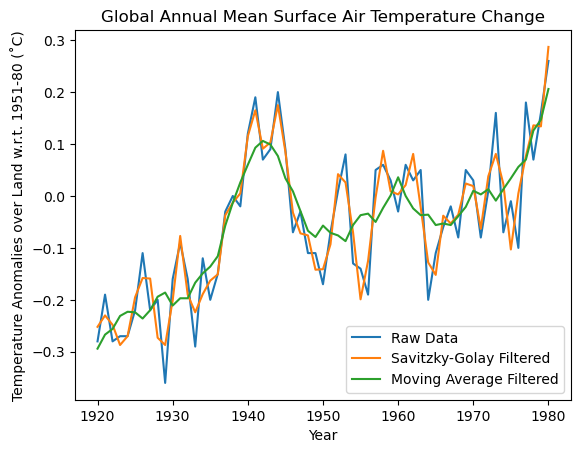

In [9]:
plt.xlabel('Year')
plt.ylabel('Temperature Anomalies over Land w.r.t. 1951-80 (˚C)')
plt.title('Global Annual Mean Surface Air Temperature Change')
plt.plot(subset_df['Year'], subset_df['Temperature'], label='Raw Data')
plt.plot(subset_df['Year'], subset_df[SG_col], label='Savitzky-Golay Filtered')
plt.plot(subset_df['Year'], subset_df[moving_avg_col], label='Moving Average Filtered')
plt.legend()
plt.show()

In [10]:
# Save the subset DataFrame to a new CSV file
OUTPUT_FILE = 'output.csv'

subset_df.to_csv(os.path.join(DATA_DIR, OUTPUT_FILE), index=False)